# 2: Damage location

In [1]:
import numpy as np
from numpy import asarray
import os
import pandas as pd
import random
import urllib.request
from IPython.display import Image

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import image
from matplotlib import pyplot
import seaborn as sns
sns.set_style("whitegrid")
from PIL import Image , ImageFont

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

import keras
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, GlobalAveragePooling2D, InputLayer

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing import image
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import ZeroPadding2D, Dropout 
from tensorflow.keras.models import Model
from tensorflow.keras import optimizers
from tensorflow.keras.applications import VGG16 ,Xception ,ResNet50 ,MobileNet ,DenseNet121 ,EfficientNetB1, VGG19, InceptionV3, mobilenet_v2

## Data Reading

##### Reading front damaged cars

In [4]:
list_images_front= []
name_front = []
for dirname, _, filenames in os.walk("C:\\Users\\user\\T5\\PROJECT\\Deep Learning\\Images\\2\\Front"):
    for filename in filenames:
        list_images_front.append(os.path.join(dirname, filename))
        name_front.append(filename)

> ##### plotting front damaged cars

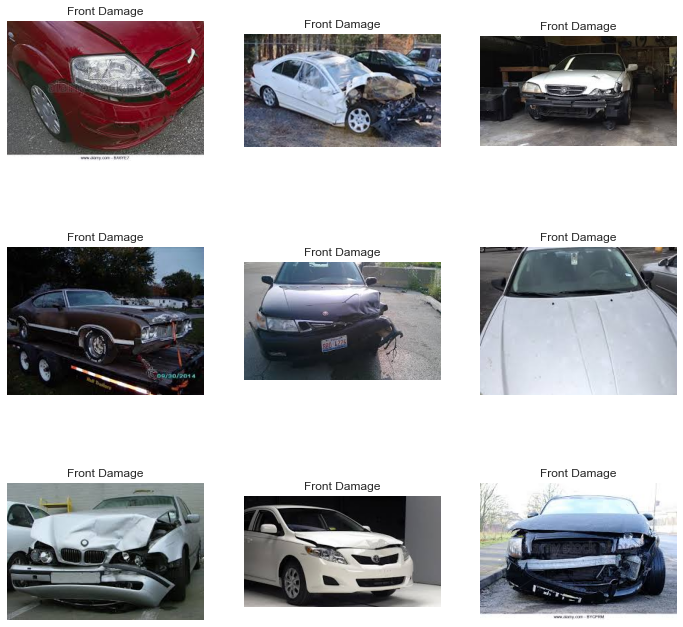

In [5]:
front = list_images_front
plt.figure(figsize=(12, 12))
ran_num = []
for i in range(0,9):
    n = random.randint(0,len(front))
    ran_num.append(n)
for i in range(9):
    ax= plt.subplot(3, 3, i + 1)
    plt.imshow(mpimg.imread(front[ran_num[i]]))
    plt.title("Front Damage")
    plt.axis("off")

> ##### Saving the front damaged cars list into a dataframe

In [6]:
df_front = pd.DataFrame()
df_front["File_Name"] = name_front
df_front["Class"] = "Front"

In [7]:
df_front.head()

,File_Name,Class
0,0001 (2).JPEG,Front
1,0001.jpeg,Front
2,0002 (2).JPEG,Front
3,0002.JPEG,Front
4,0003 (2).JPEG,Front


In [8]:
df_front.info

<bound method DataFrame.info of          File_Name  Class
0    0001 (2).JPEG  Front
1        0001.jpeg  Front
2    0002 (2).JPEG  Front
3        0002.JPEG  Front
4    0003 (2).JPEG  Front
..             ...    ...
493      0415.JPEG  Front
494      0416.JPEG  Front
495      0417.JPEG  Front
496      0418.JPEG  Front
497      0419.JPEG  Front

[498 rows x 2 columns]>

In [9]:
list_images_side = []
name_side = []
for dirname_2, _, filenames_2 in os.walk("C:\\Users\\user\\T5\\PROJECT\\Deep Learning\\Images\\2\\Side"):
    for filename in filenames_2:
        list_images_side.append(os.path.join(dirname_2, filename))
        name_side.append(filename)

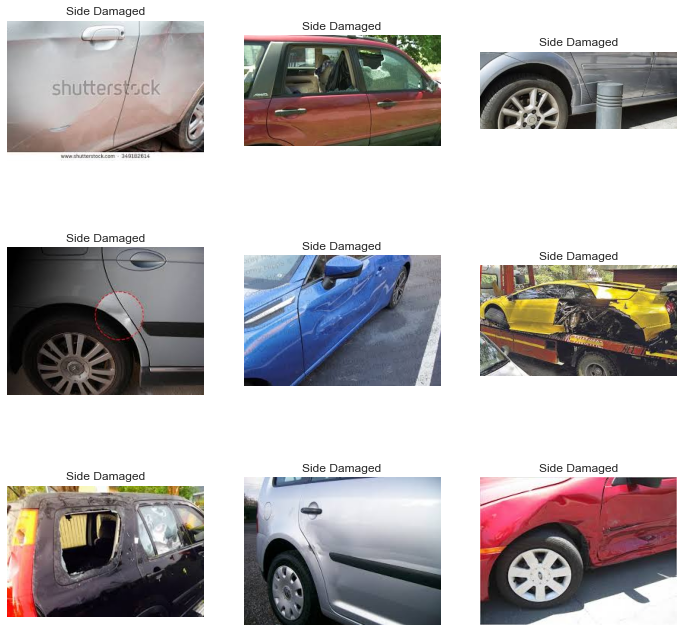

In [10]:
side = list_images_side
plt.figure(figsize=(12, 12))
ran_num = []
for i in range(0,9):
    n = random.randint(0,len(side))
    ran_num.append(n)
for i in range(9):
    ax= plt.subplot(3, 3, i + 1)
    plt.imshow(mpimg.imread(side[ran_num[i]]))
    plt.title("Side Damaged")
    plt.axis("off")

> ##### Saving the side damaged cars list into a dataframe

In [11]:
df_side = pd.DataFrame()
df_side["File_Name"] = name_side
df_side["Class"] = "Side"

##### Reading rear damaged cars

In [12]:
list_images_rear = []
name_rear = []
for dirname_2, _, filenames_2 in os.walk("C:\\Users\\user\\T5\\PROJECT\\Deep Learning\\Images\\2\\Rear"):
    for filename in filenames_2:
        list_images_rear.append(os.path.join(dirname_2, filename))
        name_rear.append(filename)

> ##### Plotting no read damaged cars

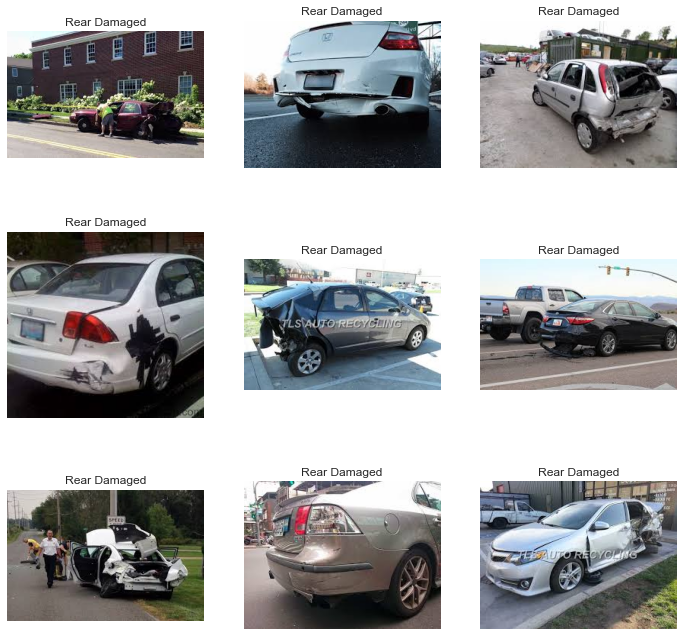

In [13]:
rear = list_images_rear
plt.figure(figsize=(12, 12))
ran_num = []
for i in range(0,9):
    n = random.randint(0,len(rear))
    ran_num.append(n)
for i in range(9):
    ax= plt.subplot(3, 3, i + 1)
    plt.imshow(mpimg.imread(rear[ran_num[i]]))
    plt.title("Rear Damaged")
    plt.axis("off")

> ##### Saving the rear damaged cars list into a dataframe

In [14]:
df_rear = pd.DataFrame()
df_rear["File_Name"] = name_rear
df_rear["Class"] = "rear"

> ##### Now, we will concat the dataframes (front, side & rear) into one dataframe.

In [15]:
df_all = pd.concat([df_front,df_side, df_rear], ignore_index=True)
df_all

,File_Name,Class
0,0001 (2).JPEG,Front
1,0001.jpeg,Front
2,0002 (2).JPEG,Front
3,0002.JPEG,Front
4,0003 (2).JPEG,Front
...,...,...
1158,0284.JPEG,rear
1159,0285.JPEG,rear
1160,0286.JPEG,rear
1161,0287.JPEG,rear


## Preprocessing

In [16]:
def prepare_image(img_path):
    img = image.load_img(img_path, target_size=(128, 128))
    x = image.img_to_array(img)
    return x

In [17]:
images = []
labels = []
files_path = "C:/Users/user/T5/PROJECT/Deep Learning/Images/2"
directory = os.fsencode(files_path)

for folder in os.listdir(directory):
    label = os.fsdecode(folder)
    for img in os.listdir(f'C:/Users/user/T5/PROJECT/Deep Learning/Images/2/{label}'):
        img_name = os.fsdecode(img)
        images.append(prepare_image(f'C:/Users/user/T5/PROJECT/Deep Learning/Images/2/{label}/{img_name}'))
        labels.append(label)

In [18]:
labeling = [int(labels[w].replace('Front', "0").replace("Side",'1').replace("Rear",'2')) for w in range(len(labels))]

In [15]:
X_digits, Y_digits = images, labeling

In [16]:
X = np.array(X_digits)
Y = to_categorical(Y_digits, num_classes=3)

In [17]:
X.shape, Y.shape

((1163, 128, 128, 3), (1163, 3))

## Data splitting

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = .2, random_state = 42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = .2, random_state = 42)

> ##### Shape of each dataframe

In [14]:
X_train.shape

(744, 128, 128, 3)

In [15]:
X_val.shape

(186, 128, 128, 3)

In [16]:
X_test.shape

(233, 128, 128, 3)

## Early stopping, ReduceLROnPlateau, Checkpoint

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5, min_delta=0.001)
lr_reduction = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', verbose=1, patience=2, factor=0.2, min_lr=0.0001)
model_checkpoint = tf.keras.callbacks.ModelCheckpoint('severe_best_model.hdf5', monitor='val_accuracy', verbose=1,save_best_only=True,mode='max')

callbacks = [early_stopping, lr_reduction, model_checkpoint]

## Modeling

> ### Logistic Regression

>> We used Logistic Regression model as a baseline model

In [ ]:
X_train_bl = X_train.reshape(4064,128*128*3)
X_val_bl = X_val.reshape(508,128*128*3)

In [ ]:
lr = LogisticRegression()
lr.fit(X_train_bl, y_train)
print('The accuracy for training : ',lr.score(X_train_bl,y_train))
print('The accuracy for validation: ',lr.score(X_val_bl,y_val))

C:\Users\abdul\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The accuracy for training :  1.0
The accuracy for validation:  0.7007874015748031


> ### Simple NN Model

>> First try with basic NN model 

In [22]:
NN_01 = Sequential([
                    InputLayer(input_shape = X_train.shape[1:]),
                    Flatten(),
                    Dense(40, activation='relu'),
                    Dense(3, activation='softmax')])

NN_01.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

NN_01.summary()

print(' ')
print('------------------------------------------------------------------------------')
print(' ')

NN_01_model = NN_01.fit(X_train, y_train, epochs=5, verbose=1, validation_split=0.1)



Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 49152)             0         
                                                                 
 dense_12 (Dense)            (None, 40)                1966120   
                                                                 
 dense_13 (Dense)            (None, 3)                 123       
                                                                 
Total params: 1,966,243
Trainable params: 1,966,243
Non-trainable params: 0
_________________________________________________________________
 
------------------------------------------------------------------------------
 
Epoch 1/5
21/21 [==============================] - 0s 11ms/step - loss: 142671472.0000 - accuracy: 0.3976 - val_loss: 1.0936 - val_accuracy: 0.5467
Epoch 2/5
21/21 [==============================] - 0s 7ms/step - loss: 1.0962

>> Second try, we will increase the first dense layer to have 500 neural

In [23]:
NN_02 = Sequential([
                    InputLayer(input_shape = X_train.shape[1:]),
                    Flatten(),
                    Dense(500, activation='relu'),
                    Dense(3, activation='softmax')])

NN_02.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

NN_02.summary()

print(' ')
print('------------------------------------------------------------------------------')
print(' ')

NN_02_model = NN_02.fit(X_train, y_train, epochs=5, verbose=1, validation_split=0.1)


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 49152)             0         
                                                                 
 dense_14 (Dense)            (None, 500)               24576500  
                                                                 
 dense_15 (Dense)            (None, 3)                 1503      
                                                                 
Total params: 24,578,003
Trainable params: 24,578,003
Non-trainable params: 0
_________________________________________________________________
 
------------------------------------------------------------------------------
 
Epoch 1/5
21/21 [==============================] - 2s 82ms/step - loss: 6286.0127 - accuracy: 0.3737 - val_loss: 1498.6621 - val_accuracy: 0.5467
Epoch 2/5
21/21 [==============================] - 2s 79ms/step - loss: 1022.

>> Third try, now we will change the activation function from relu to tanh

In [24]:
NN_03 = Sequential([
                    InputLayer(input_shape = X_train.shape[1:]),
                    Flatten(),
                    Dense(500, activation='tanh'),
                    Dense(3, activation='softmax')])

NN_03.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

NN_03.summary()

print(' ')
print('------------------------------------------------------------------------------')
print(' ')

NN_03_model = NN_03.fit(X_train, y_train, epochs=5, verbose=1, validation_split=0.1)


Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_8 (Flatten)         (None, 49152)             0         
                                                                 
 dense_16 (Dense)            (None, 500)               24576500  
                                                                 
 dense_17 (Dense)            (None, 3)                 1503      
                                                                 
Total params: 24,578,003
Trainable params: 24,578,003
Non-trainable params: 0
_________________________________________________________________
 
------------------------------------------------------------------------------
 
Epoch 1/5
21/21 [==============================] - 2s 80ms/step - loss: 1.2100 - accuracy: 0.3587 - val_loss: 1.2784 - val_accuracy: 0.2133
Epoch 2/5
21/21 [==============================] - 2s 77ms/step - loss: 1.1385 - ac

>> without activation function 

In [25]:
NN_04 = Sequential([
                    InputLayer(input_shape = X_train.shape[1:]),
                    Flatten(),
                    Dense(500),
                    Dense(3, activation='softmax')])

NN_04.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

NN_04.summary()

print(' ')
print('------------------------------------------------------------------------------')
print(' ')

NN_04_model = NN_04.fit(X_train, y_train, epochs=5, verbose=1, validation_split=0.1)



Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_9 (Flatten)         (None, 49152)             0         
                                                                 
 dense_18 (Dense)            (None, 500)               24576500  
                                                                 
 dense_19 (Dense)            (None, 3)                 1503      
                                                                 
Total params: 24,578,003
Trainable params: 24,578,003
Non-trainable params: 0
_________________________________________________________________
 
------------------------------------------------------------------------------
 
Epoch 1/5
21/21 [==============================] - 2s 81ms/step - loss: 26406.0684 - accuracy: 0.3303 - val_loss: 11278.6367 - val_accuracy: 0.3600
Epoch 2/5
21/21 [==============================] - 2s 78ms/step - loss: 764

>> Fifth try, we will increase the neurals in the dense layer to 1000, using relu as an activation function

In [26]:
NN_05 = Sequential([
                    InputLayer(input_shape = X_train.shape[1:]),
                    Flatten(),
                    Dense(1000, activation='relu'),
                    Dense(3, activation='softmax')])

NN_05.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

NN_05.summary()

print(' ')
print('------------------------------------------------------------------------------')
print(' ')

NN_05_model = NN_05.fit(X_train, y_train, epochs=5, verbose=1, validation_split=0.1)


Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_10 (Flatten)        (None, 49152)             0         
                                                                 
 dense_20 (Dense)            (None, 1000)              49153000  
                                                                 
 dense_21 (Dense)            (None, 3)                 3003      
                                                                 
Total params: 49,156,003
Trainable params: 49,156,003
Non-trainable params: 0
_________________________________________________________________
 
------------------------------------------------------------------------------
 
Epoch 1/5
21/21 [==============================] - 3s 148ms/step - loss: 8939.4600 - accuracy: 0.3453 - val_loss: 2165.3879 - val_accuracy: 0.4400
Epoch 2/5
21/21 [==============================] - 3s 144ms/step - loss: 19

>> Sixth try, we will increase the neurals in the dense layer to 1500, using relu as an activation function

In [27]:
NN_06 = Sequential([
                    InputLayer(input_shape = X_train.shape[1:]),
                    Flatten(),
                    Dense(1500, activation='relu'),
                    Dense(3, activation='softmax')])

NN_06.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

NN_06.summary()

print(' ')
print('------------------------------------------------------------------------------')
print(' ')

NN_06_model = NN_06.fit(X_train, y_train, epochs=5, verbose=1, validation_split=0.1)



Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_11 (Flatten)        (None, 49152)             0         
                                                                 
 dense_22 (Dense)            (None, 1500)              73729500  
                                                                 
 dense_23 (Dense)            (None, 3)                 4503      
                                                                 
Total params: 73,734,003
Trainable params: 73,734,003
Non-trainable params: 0
_________________________________________________________________
 
------------------------------------------------------------------------------
 
Epoch 1/5
21/21 [==============================] - 5s 215ms/step - loss: 18711.6113 - accuracy: 0.3229 - val_loss: 3774.4558 - val_accuracy: 0.2133
Epoch 2/5
21/21 [==============================] - 5s 220ms/step - loss: 3

>> Now, we will try to add more layers

In [28]:
NN_07 = Sequential([
                    InputLayer(input_shape = X_train.shape[1:]),
                    Flatten(),
                    Dense(500, activation='relu'),
                    Dense(250, activation='relu'),
                    Dense(3, activation='softmax')])

NN_07.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

NN_07.summary()

print(' ')
print('------------------------------------------------------------------------------')
print(' ')

NN_07_model = NN_07.fit(X_train, y_train, epochs=5, verbose=1, validation_split=0.1)



Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_12 (Flatten)        (None, 49152)             0         
                                                                 
 dense_24 (Dense)            (None, 500)               24576500  
                                                                 
 dense_25 (Dense)            (None, 250)               125250    
                                                                 
 dense_26 (Dense)            (None, 3)                 753       
                                                                 
Total params: 24,702,503
Trainable params: 24,702,503
Non-trainable params: 0
_________________________________________________________________
 
------------------------------------------------------------------------------
 
Epoch 1/5
21/21 [==============================] - 2s 83ms/step - loss: 3806.8008 - accura

>> Adding more layers too

In [29]:
NN_08 = Sequential([
                    InputLayer(input_shape = X_train.shape[1:]),
                    Flatten(),
                    Dense(500, activation='relu'),
                    Dense(250, activation='relu'),
                    Dense(125, activation='relu'),
                    Dense(75, activation='relu'),
                    Dense(3, activation='softmax')])

NN_08.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

NN_08.summary()

print(' ')
print('------------------------------------------------------------------------------')
print(' ')

NN_08_model = NN_08.fit(X_train, y_train, epochs=5, verbose=1, validation_split=0.1)


Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_13 (Flatten)        (None, 49152)             0         
                                                                 
 dense_27 (Dense)            (None, 500)               24576500  
                                                                 
 dense_28 (Dense)            (None, 250)               125250    
                                                                 
 dense_29 (Dense)            (None, 125)               31375     
                                                                 
 dense_30 (Dense)            (None, 75)                9450      
                                                                 
 dense_31 (Dense)            (None, 3)                 228       
                                                                 
Total params: 24,742,803
Trainable params: 24,742,803

>> #### We tried with NN model, eight times: the best one between them was number 3

> ### CNN model

>> First, we will try CNN model without dropout

In [31]:
CNN_01 = Sequential([
                     InputLayer(input_shape=X_train.shape[1:]),
                     Conv2D(filters=16, kernel_size=5, activation='relu', padding='same'),
                     MaxPooling2D(),
                     Conv2D(filters=32, kernel_size=5, activation='relu', padding='same'),
                     MaxPooling2D(),
                     Flatten(),
                     Dense(500, activation='relu'),
                     Dense(3, activation='softmax')])

CNN_01.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

CNN_01.summary()

print(' ')
print('------------------------------------------------------------------------------')
print(' ')

CNN_01_model = CNN_01.fit(X_train, y_train, epochs=10, verbose=1, validation_data=(X_val,y_val))

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 128, 128, 16)      1216      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 64, 64, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 64, 64, 32)        12832     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 flatten_15 (Flatten)        (None, 32768)             0         
                                                                 
 dense_34 (Dense)            (None, 500)             

>> CNN with dropout 50%

In [30]:
CNN_02 = Sequential([
                     InputLayer(input_shape=X_train.shape[1:]),
                     Conv2D(filters=32, kernel_size=5, activation='relu', padding='same'),
                     MaxPooling2D(),
                     Conv2D(filters=64, kernel_size=5, activation='relu', padding='same'),
                     MaxPooling2D(),
                     Conv2D(filters=128, kernel_size=5, activation='relu', padding='same'),
                     MaxPooling2D(),
                     Flatten(),
                     Dense(512, activation='relu'),
                     Dropout(0.5),
                     Dense(3, activation='softmax')])

CNN_02.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

CNN_02.summary()

print(' ')
print('------------------------------------------------------------------------------')
print(' ')

CNN_02_model = CNN_02.fit(X_train, y_train, epochs=10, verbose=1, validation_data=(X_val,y_val))

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 64)        51264     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 128)       204928    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 128)    

>> CNN with a regularizer

In [32]:
CNN_03 = Sequential([
                     InputLayer(input_shape=X_train.shape[1:]),
                     Conv2D(filters=32, 
                            kernel_size=5, 
                            activation='relu', 
                            padding='same',
                            kernel_regularizer=keras.regularizers.l2(0.001)),
                     MaxPooling2D(),
                     Conv2D(filters=64, 
                            kernel_size=5, 
                            activation='relu', 
                            padding='same', 
                            kernel_regularizer=keras.regularizers.l2(0.001)),
                     MaxPooling2D(),
                     Conv2D(filters=128, 
                            kernel_size=5, 
                            activation='relu', 
                            padding='same', 
                            kernel_regularizer=keras.regularizers.l2(0.001)),
                     MaxPooling2D(),
                     Flatten(),
                     Dense(512, 
                           activation='relu', 
                           kernel_regularizer=keras.regularizers.l2(0.001)),
                     Dense(3, activation='softmax')])

CNN_03.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

CNN_03.summary()

print(' ')
print('------------------------------------------------------------------------------')
print(' ')

CNN_03_model = CNN_03.fit(X_train, y_train, epochs=10, verbose=1,  validation_data=(X_val, y_val))

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 128, 128, 32)      2432      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 64, 64, 64)        51264     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 32, 32, 64)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 128)       204928    
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 16, 16, 128)    

>> CNN with more dense layers and dropout

In [33]:
CNN_04 = Sequential([
                     InputLayer(input_shape=X_train.shape[1:]),
                     Conv2D(filters=32, kernel_size=5, activation='relu', padding='same'),
                     MaxPooling2D(),
                     Conv2D(filters=64, kernel_size=5, activation='relu', padding='same'),
                     MaxPooling2D(),
                     Conv2D(filters=128, kernel_size=5, activation='relu', padding='same'),
                     MaxPooling2D(),
                     Flatten(),
                     Dense(256, activation='relu'),
                     Dropout(0.2),
                     Dense(512, activation='relu'),
                     Dropout(0.2),
                     Dense(3, activation='softmax')])

CNN_04.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

CNN_04.summary()

print(' ')
print('------------------------------------------------------------------------------')
print(' ')

CNN_04_model = CNN_04.fit(X_train, y_train, epochs=10, verbose=1, batch_size=300, validation_data=(X_val,y_val))

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 128, 128, 32)      2432      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 64, 64, 64)        51264     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 32, 32, 64)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 32, 32, 128)       204928    
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 16, 16, 128)    

>> Using Early stopping, ReduseLROnPlataeu, checkpoint

In [35]:
CNN_05 = Sequential([
                     InputLayer(input_shape=X_train.shape[1:]),
                     Conv2D(filters=32, kernel_size=5, activation='relu', padding='same'),
                     MaxPooling2D(),
                     Conv2D(filters=64, kernel_size=5, activation='relu', padding='same'),
                     MaxPooling2D(),
                     Conv2D(filters=128, kernel_size=5, activation='relu', padding='same'),
                     MaxPooling2D(),
                     Flatten(),
                     Dense(256, activation='relu'),
                     Dropout(0.05),
                     Dense(512, activation='relu'),
                     Dropout(0.05),
                     Dense(3, activation='softmax')])

CNN_05.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

CNN_05.summary()

print(' ')
print('------------------------------------------------------------------------------')
print(' ')

CNN_05_model = CNN_05.fit(X_train, y_train, epochs=30, verbose=1, batch_size=128, validation_data=(X_val,y_val), callbacks=callbacks)


Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 128, 128, 32)      2432      
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 64, 64, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 64, 64, 64)        51264     
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 32, 32, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 32, 32, 128)       204928    
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 16, 16, 128)    

>> increase dropout percentage

In [36]:
CNN_06 = Sequential([
                     InputLayer(input_shape=X_train.shape[1:]),
                     Conv2D(filters=16, kernel_size=5, activation='relu', padding='same'),
                     MaxPooling2D(),
                     Conv2D(filters=32, kernel_size=5, activation='relu', padding='same'),
                     MaxPooling2D(),
                     Conv2D(filters=64, kernel_size=5, activation='relu', padding='same'),
                     MaxPooling2D(),
                     Flatten(),
                     Dense(128, activation='relu'),
                     Dropout(0.5),
                     Dense(256, activation='relu'),
                     Dropout(0.5),
                     Dense(3, activation='softmax')])

CNN_06.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

CNN_06.summary()

print(' ')
print('------------------------------------------------------------------------------')
print(' ')

CNN_06_model = CNN_06.fit(X_train, y_train, epochs=30, verbose=1, validation_data=(X_val,y_val), callbacks=callbacks)

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 128, 128, 16)      1216      
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 64, 64, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 64, 64, 32)        12832     
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 32, 32, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 32, 32, 64)        51264     
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 16, 16, 64)     

> #### We used dropout and keras regularizer and still... we have an overfitting in our data. So, we wil use data augmentation as a solution for overfitting in image classification

## Data Augmentation

>> - Resize the images (180x180)
>> - Scaling/Normalization (1 to 255)
>> - Randomly flip images (Horizontally)
>> - Randomly rotate images (up to 20)

>> from [HERE](https://analyticsindiamag.com/guide-to-customized-data-augmentation-using-tensorflow/)

In [18]:
img_height = 180
img_width = 180

data_augmentation = tf.keras.Sequential([
           layers.experimental.preprocessing.Resizing(img_width, img_height),
           layers.experimental.preprocessing.Rescaling(1./255),
           layers.experimental.preprocessing.RandomFlip('horizontal'),
           layers.experimental.preprocessing.RandomRotation(0.2)
 ])

>> CNN using data augmentation

In [39]:
CNN_07 = Sequential()

CNN_07.add(data_augmentation)

CNN_07.add(Conv2D(16, activation='relu', kernel_size=(3,3)))
CNN_07.add(MaxPooling2D())

CNN_07.add(Conv2D(32, activation='relu', kernel_size=(3,3)))
CNN_07.add(MaxPooling2D())

CNN_07.add(Conv2D(64, activation='relu', kernel_size=(3,3)))
CNN_07.add(MaxPooling2D())

CNN_07.add(Flatten())

CNN_07.add(Dense(100, activation='relu'))
CNN_07.add(Dropout(0.2))

CNN_07.add(Dense(200, activation='relu'))
CNN_07.add(Dropout(0.2))

CNN_07.add(Dense(3,activation='softmax'))


CNN_07.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print(' ')
print('------------------------------------------------------------------------------')
print(' ')

CNN_07_model = CNN_07.fit(X_train, y_train, epochs=30, verbose=1, validation_data=(X_val,y_val), callbacks=callbacks)

 
------------------------------------------------------------------------------
 
Epoch 1/30
24/24 [==============================] - ETA: 0s - loss: 1.1119 - accuracy: 0.4113
Epoch 00001: val_accuracy did not improve from 0.42473
24/24 [==============================] - 7s 257ms/step - loss: 1.1119 - accuracy: 0.4113 - val_loss: 1.0907 - val_accuracy: 0.4086 - lr: 0.0010
Epoch 2/30
24/24 [==============================] - ETA: 0s - loss: 1.0909 - accuracy: 0.4261
Epoch 00002: val_accuracy did not improve from 0.42473
24/24 [==============================] - 6s 235ms/step - loss: 1.0909 - accuracy: 0.4261 - val_loss: 1.0910 - val_accuracy: 0.4086 - lr: 0.0010
Epoch 3/30
24/24 [==============================] - ETA: 0s - loss: 1.0886 - accuracy: 0.4140
Epoch 00003: val_accuracy did not improve from 0.42473
24/24 [==============================] - 6s 237ms/step - loss: 1.0886 - accuracy: 0.4140 - val_loss: 1.0879 - val_accuracy: 0.4086 - lr: 0.0010
Epoch 4/30
24/24 [====================

>> ##### plotting for cnn with augmentatoin for accurcy and loss

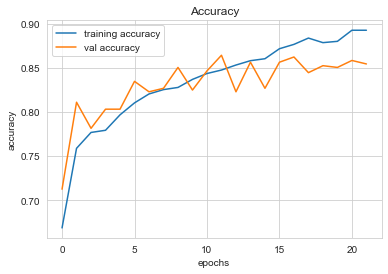

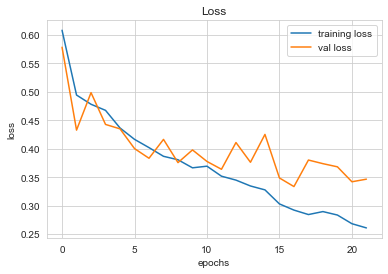

In [ ]:
plt.figure(0)
plt.plot(CNN_07_model.history['accuracy'], label='training accuracy')
plt.plot(CNN_07_model.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.figure(1)
plt.plot(CNN_07_model.history['loss'], label='training loss')
plt.plot(CNN_07_model.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend();

# Transfer Learning

## Data Augmentation

In [19]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20, min_delta=0.001)
lr_reduction = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', verbose=1, patience=2, factor=0.2, min_lr=0.00001)
model_checkpoint = tf.keras.callbacks.ModelCheckpoint('location_model.hdf5', monitor='val_accuracy', verbose=1,save_best_only=True,mode='max')

callbacks = [early_stopping, lr_reduction, model_checkpoint]

In [20]:
train_datagen = ImageDataGenerator(width_shift_range=[-200,200] ## Shifting
                                    ,horizontal_flip=True, vertical_flip=True ## Flipping
                                    ,rotation_range=20, fill_mode='nearest' ## Rotation
                                    ,brightness_range=[0.5,2.0] ## Changing brightness
                                    ,featurewise_center =True,featurewise_std_normalization = True ## Standardizing images
                                    ,shear_range=0.2
                                    ,zoom_range=0.2
                                    )



datagen = ImageDataGenerator()



train_generator = train_datagen.flow(X_train,y_train, batch_size=128,)

val_generator = datagen.flow(X_val,y_val,batch_size=128,)

In [ ]:
datagen = ImageDataGenerator(
    rotation_range = 40, 
    width_shift_range = 0.1,
    height_shift_range = 0.1, 
    brightness_range = (0.5, 1),
    shear_range=0.2,
    zoom_range = 0.2,
    horizontal_flip = True, 
    fill_mode='nearest')

> #### VGG16

In [42]:
vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=(128,128,3))

#Freeze convolutional layers
for layer in vgg_model.layers:
    layer.trainable = False
    
x = vgg_model.output
x = Flatten()(x)
x = Dense(100, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(50, activation='relu')(x)
predictions = Dense(3, activation='softmax')(x)

vgg_model = Model(inputs = vgg_model.input, outputs=predictions)
vgg_model.compile(loss='categorical_crossentropy',
                 optimizer='nadam',
                 metrics=['accuracy'])
vgg_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_21 (InputLayer)       [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0     

In [43]:
vgg_16 = vgg_model.fit_generator(train_generator,
                 validation_data=val_generator,
                 epochs=30,
                 callbacks=callbacks)

C:\Users\user\AppData\Local\Temp/ipykernel_11052/3999105781.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  vgg_16 = vgg_model.fit_generator(train_generator,
c:\Users\user\T5\PROJECT\.venv\lib\site-packages\keras_preprocessing\image\image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
c:\Users\user\T5\PROJECT\.venv\lib\site-packages\keras_preprocessing\image\image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/30
6/6 [==============================] - ETA: 0s - loss: 8.3134 - accuracy: 0.3374
Epoch 00001: val_accuracy improved from -inf to 0.29032, saving model to location_model.hdf5
6/6 [==============================] - 22s 4s/step - loss: 8.3134 - accuracy: 0.3374 - val_loss: 7.9556 - val_accuracy: 0.2903 - lr: 0.0010
Epoch 2/30
6/6 [==============================] - ETA: 0s - loss: 3.6572 - accuracy: 0.3347
Epoch 00002: val_accuracy did not improve from 0.29032
6/6 [==============================] - 21s 4s/step - loss: 3.6572 - accuracy: 0.3347 - val_loss: 5.5636 - val_accuracy: 0.2473 - lr: 0.0010
Epoch 3/30
6/6 [==============================] - ETA: 0s - loss: 1.8183 - accuracy: 0.3575
Epoch 00003: val_accuracy did not improve from 0.29032
6/6 [==============================] - 21s 4s/step - loss: 1.8183 - accuracy: 0.3575 - val_loss: 4.6432 - val_accuracy: 0.2688 - lr: 0.0010
Epoch 4/30
6/6 [==============================] - ETA: 0s - loss: 1.2885 - accuracy: 0.3737
Epoch 000

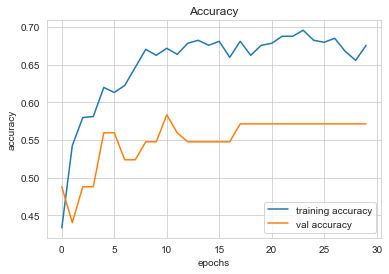

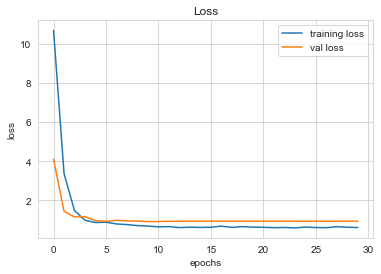

In [57]:
plt.figure(0)
plt.plot(vgg_16.history['accuracy'], label='training accuracy')
plt.plot(vgg_16.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.figure(1)
plt.plot(vgg_16.history['loss'], label='training loss')
plt.plot(vgg_16.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend();

# Data Augmentation

In [ ]:
datagen = ImageDataGenerator(
    rotation_range = 40, 
    width_shift_range = 0.1,
    height_shift_range = 0.1, 
    brightness_range = (0.5, 1),
    shear_range=0.2,
    zoom_range = 0.2,
    horizontal_flip = True, 
    fill_mode='nearest')

Found 1 validated image filenames belonging to 1 classes.


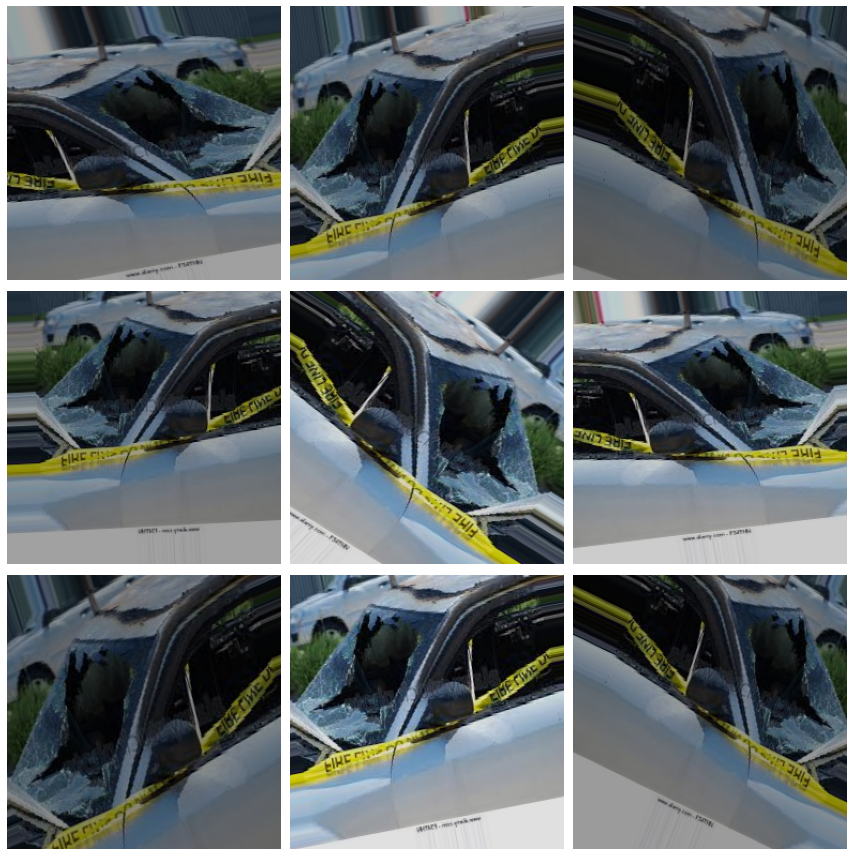

In [ ]:
sample_df = df_front.sample(1)
sample_generator = datagen.flow_from_dataframe(
    dataframe = sample_df,
    directory = 'Images\\2\\front',
    x_col = "File_Name",
    y_col = "Class")

plt.figure(figsize=(12, 12))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    for X, y in sample_generator:
        plt.imshow(X[0]/255)
        plt.axis("off")
        break
plt.tight_layout()
plt.show()

In [ ]:
len(list_images_rear)

345

In [ ]:
Sample_list_front = random.sample(list_images_front, 498)
Sample_list_side = random.sample(list_images_side, 320)
Sample_list_rear = random.sample(list_images_rear, 345)

> Saving the images

In [ ]:
for path in Sample_list_front:
    img = load_img(path)
    x = img_to_array(img)
    x = x.reshape((1,) + x.shape)

    i = 0
    for batch in datagen.flow(x, batch_size=1,save_to_dir='C:\\Users\\user\\T5\\PROJECT\\Deep Learning\\Images\\2\\Front', save_prefix='front', save_format='jpg'):
        i += 1
        if i > 4:
            break
            

for path in Sample_list_side:
    img = load_img(path)
    x = img_to_array(img)
    x = x.reshape((1,) + x.shape)

    i = 0
    for batch in datagen.flow(x, batch_size=1,save_to_dir='C:\\Users\\user\\T5\\PROJECT\\Deep Learning\\Images\\2\\Side', save_prefix='side', save_format='jpg'):
        i += 1
        if i > 4:
            break


for path in Sample_list_rear:
    img = load_img(path)
    x = img_to_array(img)
    x = x.reshape((1,) + x.shape)

    i = 0
    for batch in datagen.flow(x, batch_size=1,save_to_dir='C:\\Users\\user\\T5\\PROJECT\\Deep Learning\\Images\\2\\Rear', save_prefix='rear', save_format='jpg'):
        i += 1
        if i > 4:
            break

In [ ]:
list_images_front_Aug = []
name_front_Aug= []
for dirname, _, filenames in os.walk("C:\\Users\\user\\T5\\PROJECT\\Deep Learning\\Images\\2\\Front"):
    for filename in filenames:
        list_images_front_Aug.append(os.path.join(dirname, filename))
        name_front_Aug.append(filename)

df_images_front_Aug = pd.DataFrame()
df_images_front_Aug["File_Name"] = name_front_Aug
df_images_front_Aug["Class"] = "front"
df_images_front_Aug

,File_Name,Class
0,0001 (2).JPEG,front
1,0001.jpeg,front
2,0002 (2).JPEG,front
3,0002.JPEG,front
4,0003 (2).JPEG,front
...,...,...
2687,front_0_9989.jpg,front
2688,front_0_9990.jpg,front
2689,front_0_9994.jpg,front
2690,front_0_9995.jpg,front


In [ ]:
list_images_side_Aug = []
name_side_Aug= []
for dirname, _, filenames in os.walk("C:\\Users\\user\\T5\\PROJECT\\Deep Learning\\Images\\2\\Side"):
    for filename in filenames:
        list_images_side_Aug.append(os.path.join(dirname, filename))
        name_side_Aug.append(filename)

df_images_side_Aug = pd.DataFrame()
df_images_side_Aug["File_Name"] = name_side_Aug
df_images_side_Aug["Class"] = "side"
df_images_side_Aug

,File_Name,Class
0,0001 (2).JPEG,side
1,0001.JPEG,side
2,0002 (2).JPEG,side
3,0002.JPEG,side
4,0003 (2).JPEG,side
...,...,...
1787,side_0_9973.jpg,side
1788,side_0_9974.jpg,side
1789,side_0_9975.jpg,side
1790,side_0_9977.jpg,side


In [ ]:
list_images_rear_Aug = []
name_rear_Aug= []
for dirname, _, filenames in os.walk("C:\\Users\\user\\T5\\PROJECT\\Deep Learning\\Images\\2\\Rear"):
    for filename in filenames:
        list_images_rear_Aug.append(os.path.join(dirname, filename))
        name_rear_Aug.append(filename)

df_images_rear_Aug = pd.DataFrame()
df_images_rear_Aug["File_Name"] = name_rear_Aug
df_images_rear_Aug["Class"] = "rear"
df_images_rear_Aug

,File_Name,Class
0,0001 (2).JPEG,rear
1,0001.JPEG,rear
2,0002 (2).JPEG,rear
3,0002.JPEG,rear
4,0003 (2).JPEG,rear
...,...,...
1933,rear_0_998.jpg,rear
1934,rear_0_9984.jpg,rear
1935,rear_0_9988.jpg,rear
1936,rear_0_999.jpg,rear


In [ ]:
df_all_images_Aug = pd.concat([df_images_front_Aug, df_images_side_Aug,df_images_rear_Aug], ignore_index=True)
df_all_images_Aug

,File_Name,Class
0,0001 (2).JPEG,front
1,0001.jpeg,front
2,0002 (2).JPEG,front
3,0002.JPEG,front
4,0003 (2).JPEG,front
...,...,...
6417,rear_0_998.jpg,rear
6418,rear_0_9984.jpg,rear
6419,rear_0_9988.jpg,rear
6420,rear_0_999.jpg,rear


In [ ]:
images_Aug = []
labels_Aug = []
files_path = "C:/Users/user/T5/PROJECT/Deep Learning/Images/2"
directory = os.fsencode(files_path)

for folder in os.listdir(directory):
    label = os.fsdecode(folder)
    for img in os.listdir(f'C:/Users/user/T5/PROJECT/Deep Learning/Images/2/{label}'):
        img_name = os.fsdecode(img)
        images_Aug.append(prepare_image(f'C:/Users/user/T5/PROJECT/Deep Learning/Images/2/{label}/{img_name}'))
        labels_Aug.append(label)


In [ ]:
label_0_1_Aug = [int(labels_Aug[w].replace('Front', "0").replace("Side",'1').replace("Rear",'2')) for w in range(len(labels_Aug))]
label_0_1_Aug

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [ ]:
X_digits_Aug, Y_digits_Aug = images_Aug, label_0_1_Aug

In [ ]:
X_Aug = np.array(X_digits_Aug)
Y_Aug = to_categorical(Y_digits_Aug, num_classes=3)

In [ ]:
X_Aug.shape, Y_Aug.shape

((6422, 128, 128, 3), (6422, 3))

In [ ]:
X_train_val, X_test, y_train_val, y_test = (train_test_split(X_Aug, Y_Aug, test_size = .1, random_state = 42))
X_train, X_val, y_train, y_val = (train_test_split(X_train_val, y_train_val, test_size = .111, random_state = 42))

In [ ]:
X_train.shape

(5137, 128, 128, 3)

In [ ]:
X_val.shape

(642, 128, 128, 3)

> #### VGG19

In [48]:
vgg_model_19 = VGG19(weights='imagenet', include_top=False, input_shape=(128,128,3))

#Freeze convolutional layers
for layer in vgg_model_19.layers:
    layer.trainable = False

x = vgg_model_19.output
x = Flatten()(x)
x = Dense(100, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(50, activation='relu')(x)
predictions = Dense(3, activation='softmax')(x)

vgg_model_19 = Model(inputs = vgg_model_19.input, outputs=predictions)
vgg_model_19.compile(loss='categorical_crossentropy',
                 optimizer='nadam',
                 metrics=['accuracy'])
vgg_model_19.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0   

In [ ]:
vgg_19 = vgg_model_19.fit(X_train, y_train, validation_data=(X_val,y_val), epochs=20, callbacks=callbacks)

Epoch 1/20
161/161 [==============================] - ETA: 0s - loss: 1.9284 - accuracy: 0.4536
Epoch 00001: val_accuracy improved from 0.42368 to 0.48910, saving model to location_best_model.hdf5
161/161 [==============================] - 160s 992ms/step - loss: 1.9284 - accuracy: 0.4536 - val_loss: 1.0194 - val_accuracy: 0.4891 - lr: 0.0010
Epoch 2/20
161/161 [==============================] - ETA: 0s - loss: 1.0162 - accuracy: 0.5073
Epoch 00002: val_accuracy improved from 0.48910 to 0.56075, saving model to location_best_model.hdf5
161/161 [==============================] - 158s 980ms/step - loss: 1.0162 - accuracy: 0.5073 - val_loss: 0.9053 - val_accuracy: 0.5607 - lr: 0.0010
Epoch 3/20
161/161 [==============================] - ETA: 0s - loss: 0.9239 - accuracy: 0.5597
Epoch 00003: val_accuracy improved from 0.56075 to 0.58567, saving model to location_best_model.hdf5
161/161 [==============================] - 157s 975ms/step - loss: 0.9239 - accuracy: 0.5597 - val_loss: 0.8850 -

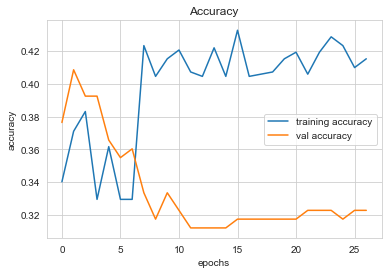

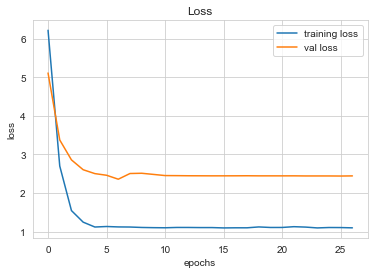

In [46]:
plt.figure(0)
plt.plot(vgg_19.history['accuracy'], label='training accuracy')
plt.plot(vgg_19.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.figure(1)
plt.plot(vgg_19.history['loss'], label='training loss')
plt.plot(vgg_19.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend();

> #### InceptionV3

In [21]:
Incep_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(128,128,3))

#Freeze convolutional layers
for layer in Incep_model.layers:
    layer.trainable = False
    
x = Incep_model.output
x = Flatten()(x)
x = Dense(200, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(100, activation='relu')(x)
predictions = Dense(3, activation='softmax')(x)

Incep_model = Model(inputs = Incep_model.input, outputs=predictions)
Incep_model.compile(loss='categorical_crossentropy',
                 optimizer='nadam',
                 metrics=['accuracy'])
Incep_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 63, 63, 32)   864         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 63, 63, 32)  96          ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                              

In [22]:
incep = Incep_model.fit_generator(train_generator,
                 validation_data=val_generator,
                 epochs=30,
                 callbacks=callbacks)

C:\Users\user\AppData\Local\Temp/ipykernel_7764/493845409.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  incep = Incep_model.fit_generator(train_generator,
c:\Users\user\T5\PROJECT\.venv\lib\site-packages\keras_preprocessing\image\image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
c:\Users\user\T5\PROJECT\.venv\lib\site-packages\keras_preprocessing\image\image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/30
6/6 [==============================] - ETA: 0s - loss: 237.2440 - accuracy: 0.3118
Epoch 00001: val_accuracy improved from -inf to 0.40860, saving model to location_model.hdf5
6/6 [==============================] - 10s 1s/step - loss: 237.2440 - accuracy: 0.3118 - val_loss: 70.9078 - val_accuracy: 0.4086 - lr: 0.0010
Epoch 2/30
6/6 [==============================] - ETA: 0s - loss: 64.6713 - accuracy: 0.3414
Epoch 00002: val_accuracy did not improve from 0.40860
6/6 [==============================] - 6s 911ms/step - loss: 64.6713 - accuracy: 0.3414 - val_loss: 17.7839 - val_accuracy: 0.3602 - lr: 0.0010
Epoch 3/30
6/6 [==============================] - ETA: 0s - loss: 37.4296 - accuracy: 0.3185
Epoch 00003: val_accuracy did not improve from 0.40860
6/6 [==============================] - 6s 900ms/step - loss: 37.4296 - accuracy: 0.3185 - val_loss: 4.9336 - val_accuracy: 0.3871 - lr: 0.0010
Epoch 4/30
6/6 [==============================] - ETA: 0s - loss: 4.5696 - accuracy: 0.

>> ##### plotting for InceptionV3 (accuracy & loss)

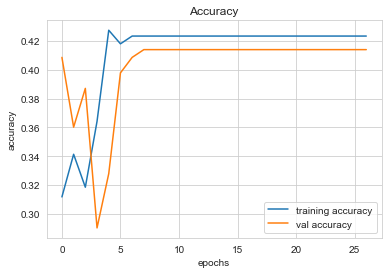

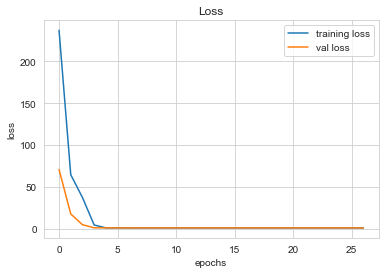

In [23]:
plt.figure(0)
plt.plot(incep.history['accuracy'], label='training accuracy')
plt.plot(incep.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.figure(1)
plt.plot(incep.history['loss'], label='training loss')
plt.plot(incep.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend();

> #### MobileNetV2

In [42]:
mn2_model = mobilenet_v2.MobileNetV2(weights='imagenet', include_top=False, input_shape=(128,128,3))

#Freeze convolutional layers
for layer in mn2_model.layers:
    layer.trainable = False
    
x = mn2_model.output
x = Flatten()(x)
x = Dense(100, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(50, activation='relu')(x)
predictions = Dense(3, activation='softmax')(x)

mn2_model = Model(inputs = mn2_model.input, outputs=predictions)
mn2_model.compile(loss='categorical_crossentropy',
                 optimizer='nadam',
                 metrics=['accuracy'])
mn2_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 64, 64, 32)   864         ['input_1[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 64, 64, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 64, 64, 32)   0           ['bn_Conv1[0][0]']           

In [ ]:
mobilev2 = mn2_model.fit(X_train, y_train,  validation_data=(X_val,y_val), epochs=20, callbacks=callbacks)

Epoch 1/20
161/161 [==============================] - ETA: 0s - loss: 1.2875 - accuracy: 0.3981
Epoch 00001: val_accuracy improved from -inf to 0.41277, saving model to location_best_model.hdf5


c:\Users\user\T5\PROJECT\.venv\lib\site-packages\keras\engine\functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


161/161 [==============================] - 34s 198ms/step - loss: 1.2875 - accuracy: 0.3981 - val_loss: 1.0879 - val_accuracy: 0.4128 - lr: 0.0010
Epoch 2/20
161/161 [==============================] - ETA: 0s - loss: 1.1057 - accuracy: 0.4178
Epoch 00002: val_accuracy improved from 0.41277 to 0.42368, saving model to location_best_model.hdf5
161/161 [==============================] - 31s 190ms/step - loss: 1.1057 - accuracy: 0.4178 - val_loss: 1.0633 - val_accuracy: 0.4237 - lr: 0.0010
Epoch 3/20
161/161 [==============================] - ETA: 0s - loss: 1.0711 - accuracy: 0.4191
Epoch 00003: val_accuracy did not improve from 0.42368
161/161 [==============================] - 31s 191ms/step - loss: 1.0711 - accuracy: 0.4191 - val_loss: 1.0497 - val_accuracy: 0.4159 - lr: 0.0010
Epoch 4/20
 82/161 [==============>...............] - ETA: 13s - loss: 1.0609 - accuracy: 0.4223

KeyboardInterrupt: 

>> ##### plotting for MobileNetV2 (accuracy & loss)

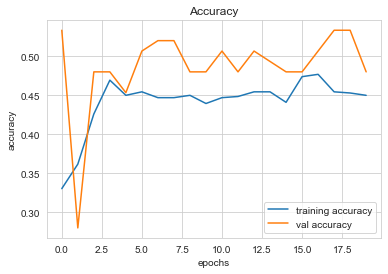

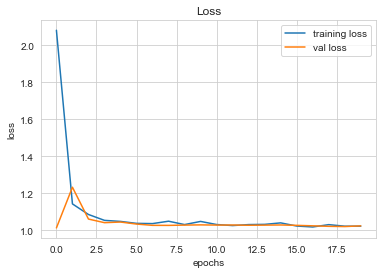

In [26]:
plt.figure(0)
plt.plot(mobilev2.history['accuracy'], label='training accuracy')
plt.plot(mobilev2.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.figure(1)
plt.plot(mobilev2.history['loss'], label='training loss')
plt.plot(mobilev2.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend();

In [19]:
from sklearn.metrics import accuracy_score


### Loading the best model

In [ ]:
from keras.models import load_model
model = load_model('location_best_model.hdf5')

### test our model and build a pipe

In [ ]:
print('Accuracy of our model on test data: ', model.evaluate(X_test,y_test)[1]*100,'%')

8/8 [==============================] - 1s 57ms/step - loss: 0.9420 - accuracy: 0.5622
Accuracy of our model on test data:  56.223177909851074 %


## build a pipe for severity check

In [ ]:
def location(img, model):
    urllib.request.urlretrieve(img, 'save.jpg')
    img = load_img('save.jpg', target_size=(128,128))
    x = img_to_array(img)
    x = x.reshape((1,)+x.shape)/255
    pred = model.predict(x)
    pred_labels = np.argmax(pred, axis=1)
    d = {0:'Front', 1:'Rear', 2:'Side'}
    for key in d.keys():
        if pred_labels[0] == key:
            print("Validating location of damage....Result:",d[key])
    

## Try our model with damaged car

https://image.shutterstock.com/image-photo/zaporozhye-ukraine-november-12-2019-600w-1912770286.jpg

In [ ]:
location("http://repairablecars-forsale.com/photos/Exotic_Wrecked_Cars_F430_Spider_Red_Ferrari.jpg", model)

## Try our model with not damaged car